In [1]:
import numpy as np
import pandas as pd

# Clase 2: Análisis Exploratorio de Datos (EDA) #

## Importando datos con Pandas ##

In [2]:
import os

DATA_FOLDER = 'datasets'
COVID_CSV = '200914COVID19MEXICO.csv'
COVID_URL = os.path.join('..', DATA_FOLDER, COVID_CSV)

In [3]:
print(COVID_URL)

..\datasets\200914COVID19MEXICO.csv


In [4]:
# Definir el tipo de dato hace el proceso más eficiente
types = {
    'SECTOR': np.int8,
    'SEXO': np.int8,
    'ENTIDAD_RES': np.int8,
    'FECHA_INGRESO': 'object',
    'FECHA_SINTOMAS': 'object',
    'FECHA_DEF': 'object',
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'NACIONALIDAD': np.int8,
    'EMBARAZO': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION':np.int8,
    'OTRA_COM': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'OTRO_CASO': np.int8,
    'RESULTADO': np.int8,
    'UCI': np.int8
}

In [5]:
# 'latin' porque contiene acentos
df = pd.read_csv(COVID_URL, encoding='latin', dtype=types)

In [6]:
df.head(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-14,063d1d,2,4,9,1,9,9,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-09-14,0ee9be,2,4,9,2,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-09-14,18ae31,2,4,15,1,15,15,58,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-09-14,02d970,2,4,13,2,13,13,76,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-09-14,05a196,2,4,12,2,20,12,29,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
5,2020-09-14,08f0e2,2,4,15,1,15,15,33,1,...,2,1,2,1,99,1,99,MÃ©xico,99,97
6,2020-09-14,100180,2,4,9,1,10,9,15,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
7,2020-09-14,1622ec,2,4,15,1,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
8,2020-09-14,18f860,2,3,2,1,2,2,2,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
9,2020-09-14,1057de,2,3,15,2,15,15,33,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97


In [7]:
# Los tipos que definimos se respetan. Los otros se intuyen (no de manera óptima)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520463 entries, 0 to 1520462
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1520463 non-null  object
 1   ID_REGISTRO          1520463 non-null  object
 2   ORIGEN               1520463 non-null  int64 
 3   SECTOR               1520463 non-null  int8  
 4   ENTIDAD_UM           1520463 non-null  int64 
 5   SEXO                 1520463 non-null  int8  
 6   ENTIDAD_NAC          1520463 non-null  int64 
 7   ENTIDAD_RES          1520463 non-null  int8  
 8   MUNICIPIO_RES        1520463 non-null  int64 
 9   TIPO_PACIENTE        1520463 non-null  int64 
 10  FECHA_INGRESO        1520463 non-null  object
 11  FECHA_SINTOMAS       1520463 non-null  object
 12  FECHA_DEF            1520463 non-null  object
 13  INTUBADO             1520463 non-null  int8  
 14  NEUMONIA             1520463 non-null  int8  
 15  EDAD           

### Estrategia para el análisis ###

* Eliminar campos que no nos sirven ahora: ID Registro, Municipio de procedencia, Origen, Entidad_UM, Fecha de Síntomas, País de Origen, País de Nacionalidad, Migrante, Otro Caso, Tipo de Paciente, Habla lengua indígena, Fecha de actualización.
* Indagar y trabajar más sobre campos útiles: Fecha de actualización, Fecha de defunción, Fecha de ingreso.
* Identificar preguntas que queremos responder
    * ¿Cuántos hombres y mujeres se infectaron o fallecieron?
    * ¿Qué estados han sufrido más por el COVID?
    * ¿Cómo ha ido avanzando la pandemia en México?
    * ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
    * ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
    * ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?
    * ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?
    * ¿Existe alguna correlación entre el tiempo en morir y las edades?

### Limpiando datos ###
Limpiar involucra el proceso de convertir los datos a un formato legible y eficiente para su procesamiento. En nuestro caso, eliminaremos ciertos campos y registros innecesarios, además de cambiar el formato de algunas columnas.

In [8]:
# Eliminando columnas innecesarias
cols = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'ENTIDAD_UM', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 'HABLA_LENGUA_INDIG',
       'OTRO_CASO', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN']
df.drop(cols, axis=1, inplace=True)

In [9]:
# Eliminamos registros no relacionados al COVID
rows = df[df.RESULTADO==2].index
df.drop(rows, inplace=True)

In [10]:
# La memoria se ha reducido drásticamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750266 entries, 0 to 1520462
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SECTOR          750266 non-null  int8  
 1   SEXO            750266 non-null  int8  
 2   ENTIDAD_RES     750266 non-null  int8  
 3   FECHA_INGRESO   750266 non-null  object
 4   FECHA_SINTOMAS  750266 non-null  object
 5   FECHA_DEF       750266 non-null  object
 6   INTUBADO        750266 non-null  int8  
 7   NEUMONIA        750266 non-null  int8  
 8   EDAD            750266 non-null  int8  
 9   EMBARAZO        750266 non-null  int8  
 10  DIABETES        750266 non-null  int8  
 11  EPOC            750266 non-null  int8  
 12  ASMA            750266 non-null  int8  
 13  INMUSUPR        750266 non-null  int8  
 14  HIPERTENSION    750266 non-null  int8  
 15  OTRA_COM        750266 non-null  int8  
 16  CARDIOVASCULAR  750266 non-null  int8  
 17  OBESIDAD        750266 non-n

In [11]:
# Transformamos datos de fecha a un formato más legible
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'], format='%Y-%m-%d')

### Transformando datos con apply() ###

In [12]:
# Ahora podemos saber el año, mes y día de forma más sencilla
df.iloc[5].FECHA_SINTOMAS.day # month, year

11

In [13]:
# FECHA_DEF no puede ser convertido directamente, debido a que posee fechas incorrectas ('9999-99-99')
fecha_modif = df.apply(lambda fila: '2000-01-01' if fila.FECHA_DEF=='9999-99-99' else fila.FECHA_DEF, axis='columns')

In [14]:
fecha_modif

0          2000-01-01
1          2000-01-01
2          2000-01-01
3          2020-04-27
4          2020-04-06
              ...    
1520458    2000-01-01
1520459    2000-01-01
1520460    2000-01-01
1520461    2000-01-01
1520462    2000-01-01
Length: 750266, dtype: object

In [15]:
df['FECHA_DEF'] = fecha_modif

In [16]:
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format='%Y-%m-%d')

In [17]:
df.info() # Podríamos mejorar el uso de memoria por datetime en un futuro

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750266 entries, 0 to 1520462
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SECTOR          750266 non-null  int8          
 1   SEXO            750266 non-null  int8          
 2   ENTIDAD_RES     750266 non-null  int8          
 3   FECHA_INGRESO   750266 non-null  object        
 4   FECHA_SINTOMAS  750266 non-null  datetime64[ns]
 5   FECHA_DEF       750266 non-null  datetime64[ns]
 6   INTUBADO        750266 non-null  int8          
 7   NEUMONIA        750266 non-null  int8          
 8   EDAD            750266 non-null  int8          
 9   EMBARAZO        750266 non-null  int8          
 10  DIABETES        750266 non-null  int8          
 11  EPOC            750266 non-null  int8          
 12  ASMA            750266 non-null  int8          
 13  INMUSUPR        750266 non-null  int8          
 14  HIPERTENSION    750266 non-null  in

### Salvemos los datos ###

In [18]:
CLEAN_COVID_FILENAME = 'Clean_Covid_Dataset.csv'
CLEAN_COVID_URL = os.path.join('..', DATA_FOLDER, CLEAN_COVID_FILENAME)
print(CLEAN_COVID_URL)
df.to_csv(CLEAN_COVID_URL)

..\datasets\Clean_Covid_Dataset.csv


### Indexado Jerárquico: Índices que tienen índices ###

In [19]:
df1 = df.copy()

### Agrupaciones y Agregaciones ###
En esta sección responderemos las preguntas
* ¿Cuántos hombres y mujeres se infectaron o fallecieron?
* ¿Qué estados han sufrido más por el COVID?
* ¿Cómo ha ido avanzando la pandemia en México?
* ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Qué tipo de complicaciones presentaron los hospitalizados?

#### ¿Cuántos hombres y mujeres se infectaron o fallecieron? ####

In [20]:
# Agrupemos por sexo y luego por resultado
covid_por_genero = df['RESULTADO'].groupby([df['SEXO'], df['RESULTADO']]).count()
covid_por_genero

SEXO  RESULTADO
1     1            321474
      3             39823
2     1            350242
      3             38727
Name: RESULTADO, dtype: int64

#### ¿Qué estados han sufrido más por el COVID? ####

In [21]:
# Agrupamos por estado y luego por resultado
covid_por_estado = df['RESULTADO'].groupby([df['ENTIDAD_RES'], df['RESULTADO']]).count()
covid_por_estado

ENTIDAD_RES  RESULTADO
1            1             6441
             3              229
2            1            18346
             3              899
3            1             9033
                          ...  
30           3             2260
31           1            16729
             3              357
32           1             6409
             3               87
Name: RESULTADO, Length: 64, dtype: int64

#### ¿Cómo ha ido avanzando la pandemia en México? ####

In [22]:
# ¿Cómo ha ido avanzando la pandemia en México?
covid_por_mes = df['RESULTADO'].groupby([df['FECHA_INGRESO'], df['RESULTADO']]).count()
covid_por_mes

FECHA_INGRESO  RESULTADO
2020-01-13     1               1
2020-01-29     1               1
2020-01-30     3               1
2020-02-07     3               1
2020-02-24     1               1
                            ... 
2020-09-12     1             419
               3            4024
2020-09-13     1             114
               3            2275
2020-09-14     3             365
Name: RESULTADO, Length: 383, dtype: int64

#### ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia? ####

In [23]:
covid_por_sistema = df['RESULTADO'].groupby([df['SECTOR'], df['RESULTADO']]).count()
covid_por_sistema

SECTOR  RESULTADO
1       1                54
        3                 3
2       1               452
        3                 5
3       1             13108
        3               648
4       1            212232
        3             15968
5       1              5288
        3               536
6       1             28839
        3              2424
7       1               568
        3                44
8       1              7165
        3               126
9       1             20949
        3             13623
10      1              4246
        3               684
11      1              4806
        3              1197
12      1            373602
        3             43173
13      1               407
        3               119
Name: RESULTADO, dtype: int64

### Concatenando DataFrames ###
Aquí respondemos las preguntas:
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?

#### ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID? ####

In [24]:
df['FALLECIDO'] = df.apply(lambda x: 0 if x.FECHA_DEF.year==2000 else 1, axis='columns')

In [25]:
# No podemos agrupar en una sóla línea porque las enfermedades están en varias columnas
covid_por_hiper = df[df['HIPERTENSION']==1][['HIPERTENSION']].groupby([df['FALLECIDO']]).count()
covid_por_hiper

,HIPERTENSION
FALLECIDO,
0,109262
1,32654


In [26]:
covid_por_hiper = covid_por_hiper.T
covid_por_hiper

FALLECIDO,0,1
HIPERTENSION,109262,32654


In [27]:
covid_por_cardio = df[df['CARDIOVASCULAR']==1][['CARDIOVASCULAR']].groupby(df['FALLECIDO']).count()
covid_por_cardio

,CARDIOVASCULAR
FALLECIDO,
0,10854
1,3918


In [28]:
covid_por_cardio = covid_por_cardio.T
covid_por_cardio

FALLECIDO,0,1
CARDIOVASCULAR,10854,3918


In [29]:
covid_por_hiper.append(covid_por_cardio)

FALLECIDO,0,1
HIPERTENSION,109262,32654
CARDIOVASCULAR,10854,3918


Diseñamos una función que haga el proceso de concatenado por nosotros

In [30]:
enfermedades = ['EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRA_COM']

In [31]:
# Diseñamos una función que lo haga por nosotros
def resultadoPorAfeccion(datos, afecciones):
    res = 0
    isFirst = True
    for afec in afecciones:
        a = df[df[afec]==1][[afec]].groupby([df['FALLECIDO']]).count()
        a = a.T
        if (isFirst):
            res = a
            isFirst = False
        else:
            res = res.append(a)
    return res

In [32]:
covid_por_enf = resultadoPorAfeccion(df, enfermedades)
covid_por_enf

FALLECIDO,0,1
EMBARAZO,5606,72
DIABETES,85081,27950
EPOC,7247,3527
ASMA,17835,1462
INMUSUPR,6464,1811
HIPERTENSION,109262,32654
CARDIOVASCULAR,10854,3918
OBESIDAD,114122,17822
RENAL_CRONICA,8904,5118
TABAQUISMO,48838,5829


#### ¿Cuál es el efecto de las complicaciones presentadas en lso infectados? ####

In [33]:
complicaciones = ['INTUBADO', 'NEUMONIA', 'UCI']

In [34]:
covid_por_comp = resultadoPorAfeccion(df, complicaciones)
covid_por_comp

FALLECIDO,0,1
INTUBADO,6364,24794
NEUMONIA,81390,54209
UCI,8086,7460


### Binning: Pasando datos numéricos a categóricos ###
En esta sección responderemos la pregunta
* ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?

La discretización es el proceso de convertir variables una variable continua (números con decimales) a una discreta (números enteros).   
Podríamos usar otra vez apply() para crear un campo nuevo 'RANGO_EDAD' basado en lo contenido dentro del campo 'EDAD', pero Pandas ya viene con una función para hacer todo ese trabajo más fácil.

In [35]:
df['RANGO_EDAD'] = pd.cut(df['EDAD'], [0,12,19,29,50,65,np.inf], labels=range(6), right=False)

In [36]:
covid_por_edades = df[['RANGO_EDAD']].groupby([df['RANGO_EDAD'], df['RESULTADO']]).count()
covid_por_edades

RANGO_EDAD
RANGO_EDAD RESULTADO            
0          1                9257
           3                2127
1          1               12487
           3                2560
2          1               91578
           3               13469
3          1              308622
           3               35610
4          1              161040
           3               16351
5          1               88732
           3                8433

### Correlaciones ###
Respondemos la pregunta
* ¿Existe alguna correlación entre el tiempo en morir y las edades?

In [37]:
def calcularDiasVivo(fila):
    tiempo = 0
    if (fila.FALLECIDO==1):
        tiempo = fila.FECHA_DEF - fila.FECHA_SINTOMAS
        tiempo = tiempo.days
    return tiempo

In [38]:
df['DIAS_VIVO'] = df.apply(calcularDiasVivo, axis='columns')

In [39]:
# Coeficientes de Correlacion Lineal
df[df['FALLECIDO']==1][['EDAD', 'DIAS_VIVO']].corr()

,EDAD,DIAS_VIVO
EDAD,1.000000,-0.036369
DIAS_VIVO,-0.036369,1.000000


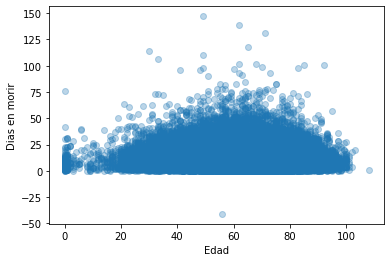

In [40]:
import matplotlib.pyplot as plt

# Las graficas siempre se muestran en Jupyter, aunque usar plt.show() es necesario en otros entornos
x = df[df['FALLECIDO']==1]['EDAD']
y = df[df['FALLECIDO']==1]['DIAS_VIVO']
plt.scatter(x=x, y=y, alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Dias en morir')
plt.show()

### Otras cosas más que aprender de Pandas ###
Pandas puede hacer una multitud de tareas
* Unir dos o más DataFrames según diferentes reglas
* Reordenar los registros según condiciones específicas
* Indexado Jerárquico: Columnas que tienen columnas
* Manejo más eficiente de memeoria y CPU, usando librerías oomo Spark, etc
* Tablas de Pivote
* Integración con otras librerías, como scikit-learn
* Análisis de series de tiempo